In [98]:
#Note: we only repeat this step from before, because this is a new .ipyb page.
#   it only needs to be executed once per file.

#We'll import libraries as needed, but when submitting, having them all at the top is best practice
import pandas as pd

# Reloading the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
df = pd.read_csv(url) #read CSV into Python as a dataframe

column_names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'type']
df = pd.read_csv(url, names = column_names) #read CSV into Python as a dataframe

#Choosing sepal-length as the independent variable. 
X = df.drop(columns=['sepal-length']) #indpendent variables
y = df[['sepal-length']].copy() #dependent variables

In [LINK GOES HERE] the previous section, we avoid using categorical data by simplifying and removing it. While this sped things along, it also dropped potentially valuable insight from our analysis. Now that code is working, we'll go and rebuild out models using that categorical data, the 'type' feature.

In [38]:
df['type']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: type, Length: 150, dtype: object

We have three unique flower types, equally distributed, in this feature:

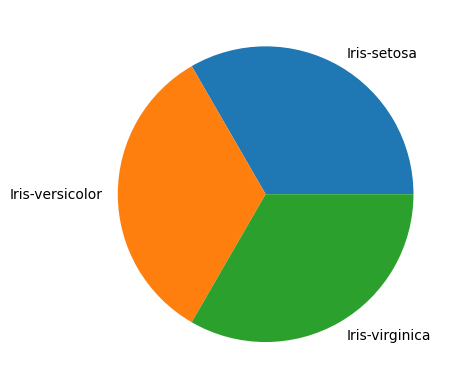

In [99]:
df.groupby('type').size()
df.groupby('type').size().plot(kind='pie');


Recall, a coding error [LINK HERE] was returned because the

Most machine learning models can only interpret numerical data. Thus *feature encoding*, processing data into numerical form, is an essential data analytical skill. To do this properly you should understand your data before preceding. For example, we could simply re-label the types as follows:
$$ 
\text{Iris-setosa} \rightarrow 1 \\
\text{Iris-versicolor} \rightarrow 2 \\
\text{Iris-virginica} \rightarrow 3 \\
$$   
and hand this off to the algorithm. But while this would fix the coding error, any numerical interpretation of this re-labeling would be meaningless, e.g., 'Iris-setosa' is not twice as much as 'Iris-versicolor,' nor should one type be ranked over the other. 

A flower either is an 'Iris-setosa' OR it isn't. Each type is similarly binary so we can interpret *each unique type as a unique feature*, with 1 or 0 indicating whether the category applies or not, respectively. Here is one way to do this:

In [129]:
before_dummy = df.sample(n=100, random_state = 10)
before_dummy = before_dummy.iloc[:,4:]
after_dummy = pd.get_dummies(before_dummy)
# df2
# X_sample.loc[:,['type']]
# X_sample.iloc[ : , 4:]
# df2.iloc[ : , 4:]

#Nice displays are nice but not required. 
from IPython.display import display_html 
before_styler = before_dummy.head().style.set_table_attributes("style='display:inline'").set_caption('Before')
after_styler = after_dummy.head().style.set_table_attributes("style='display:inline'").set_caption('After vectorization')
space = "\xa0" * 10 #space between columns
arrow = "<html> &#x21e8; </html>"

arrow = '''
 <table>
  <tr>
    <td>Emil</td>
    <td>Tobias</td>
    <td>Linus</td>
  </tr>
  <tr>
    <td>16</td>
    <td>14</td>
    <td>10</td>
  </tr>
</table> 
'''

display_html(before_styler._repr_html_() + arrow + after_styler._repr_html_(), raw=True)

Before 
 
 
   
 type 
 
 
 
 
 87 
 Iris-versicolor 
 
 
 111 
 Iris-virginica 
 
 
 10 
 Iris-setosa 
 
 
 91 
 Iris-versicolor 
 
 
 49 
 Iris-setosa 
 
 
 

 
 
 Emil 
 Tobias 
 Linus 
 
 
 16 
 14 
 10 
 
 

 
 After vectorization 
 
 
   
 type_Iris-setosa 
 type_Iris-versicolor 
 type_Iris-virginica 
 
 
 
 
 87 
 0 
 1 
 0 
 
 
 111 
 0 
 0 
 1 
 
 
 10 
 1 
 0 
 0 
 
 
 91 
 0 
 1 
 0 
 
 
 49 
 1 
 0 
 0

In [101]:
# from sklearn.preprocessing import OneHotEncoder

#Instantiate OneHotEncoder (ohe). 
#Note Pandas get_dummies can also perform this function, but ohe has some ML application advantages.

ohe = OneHotEncoder(sparse = False) 